In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

station="AAU"
if station=="AAU":
    folder_path="../station_AAU_rate_59677090"
if station=="NN":
    station="NN11"
    folder_path="../station_NN11_rate_404820636"

with open(f"{folder_path}/rd_raw.pickle", "rb") as f:
    Rdl_raw = pickle.load(f)
f.close()
with open(f"{folder_path}/los.pickle", 'rb') as f:
    los = pickle.load(f)
f.close()


rho="0.20"
id=0
obj_type="gs"
folder_path=f"../final_results/Optim_results_{obj_type}"
station_path=os.path.join(folder_path, station)


rho_path=os.path.join(station_path, f"util_{rho}")
# rho_path="Optim_results_raw33/AAU"

with open(f"{rho_path}/T_sc.pickle", 'rb') as f:
    T_sc = pickle.load(f)
f.close()
with open(f"{rho_path}/T_dl.pickle", "rb") as f:
    T_dl= pickle.load(f)
f.close()
# with open(f"{folder_path}/T_gw.pickle", "rb") as f:
#     T_gw=pickle.load(f)
# f.close()
with open(f"{rho_path}/T_idle.pickle", "rb") as f:
    T_idle = pickle.load(f)
f.close()
with open(f"{rho_path}/outage_los.pickle", "rb") as f:
    outage_los = pickle.load(f)
f.close()
with open(f"{rho_path}/Rdl.pickle", "rb") as f:
    Rdl = pickle.load(f)
f.close()
with open(f"{rho_path}/Rsc.pickle", "rb") as f:
    Rsc = pickle.load(f)
f.close()

In [2]:
def plot_rectagles(lst, color='tab:blue', alpha=0.3, label=None):
    in_region = False
    start = 0
    label_added = False  # Track if label has been added

    for i, val in enumerate(lst + [False]):
        if val and not in_region:
            start = i
            in_region = True
        elif not val and in_region:
            if label and not label_added:
                plt.axvspan(start, i, color=color, alpha=alpha, label=label)
                label_added = True
            else:
                plt.axvspan(start, i, color=color, alpha=alpha)
            in_region = False


0.0002945161100312187
0.009481668773704172
0.015530816202312933
2024.868499491705
5654.138227256506


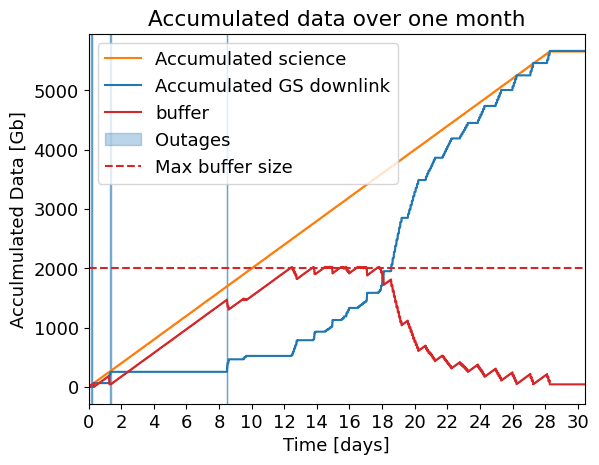

In [3]:
buffer_size = 250 * 1e9/1e9*8
sc_cumsum = (np.cumsum(T_sc)*Rsc)/1e9
dl_cumsum = np.cumsum(T_dl)*Rdl_raw/1e9
T_dl=T_dl.astype(bool)
outages_full=los[:len(T_dl)] & (outage_los[:len(T_dl)]==False)
outages=T_dl&(outage_los[:len(T_dl)]==False)
outage_cumsum=np.cumsum(outages)*Rdl_raw/1e9

time_with_outages=T_dl&outage_los[:len(T_dl)]
plt.rcParams.update({'font.size': 13})
plt.step(range(len(T_dl)), sc_cumsum, label = 'Accumulated science', color="tab:orange")
plt.step(range(len(T_dl)), dl_cumsum, label = 'Accumulated GS downlink', color="tab:blue")
# plt.step(range(len(T_dl)), outage_cumsum, label = 'buffer')
plt.step(range(len(T_dl)), sc_cumsum - dl_cumsum + outage_cumsum, label = 'buffer', color="tab:red")
# plot_rectagles(los, label="los", color = 'tab:purple')
plot_rectagles(outages_full, label="Outages")
plt.axhline(buffer_size, c='tab:red', linestyle='--', label='Max buffer size')
plt.legend()
plt.xlim(0, len(T_dl))
plt.xticks(
            ticks=np.arange(0, len(T_dl), 2*24*60),
            labels=[str(int(i/(24*60))) for i in np.arange(0, len(T_dl), 2*24*60)]
        )
plt.xlabel("Time [days]")
plt.ylabel("Acculmulated Data [Gb]")
plt.title("Accumulated data over one month")
plt.savefig(f"buffer_overflow_r_{rho}_{station}.pdf", format="pdf", bbox_inches="tight")
print(np.sum(outages_full)/np.sum(los))
print(np.sum(outages_full&T_dl)/np.sum(T_dl))
print(np.sum(T_dl)/np.sum(los))
print(max(sc_cumsum - dl_cumsum + outage_cumsum))
print(max(sc_cumsum))